<a href="https://colab.research.google.com/github/FelipeMu/memoria2024-testing/blob/main/cwt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conexión a Google drive e instalación de paquetes

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!pip install pycwt
!pip install ssqueezepy

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.5/753.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.2/127.2 kB 2.7 MB/s eta 0:00:00


In [2]:
import csv
import os
# version3.0
import pywt
import numpy as np
import matplotlib.pyplot as plt
# plot fourier transform for comparison
from numpy.fft import rfft, rfftfreq
# Para la icwt
import pycwt
# Para pasar plot a imagen rgb
from PIL import Image
from io import BytesIO

# periodo de muestreo
ts = 0.2 # seg

# frecuencia de muestreo
fs = 1.0/ts # Hz

print('Periodo de muestreo de señales:', ts, '[seg]')
print('Frecuencia de muestreo de señales:', fs, '[Hz]\n')
# Arreglo para almcenar los datos de las senales
pam = [] # PAM: Presión Arterial Media
vsc = [] # VSC: Velocidad Sanguínea Cerebral

#=================================================

folder_csv = '/content/drive/MyDrive/Trabajo de titulación/Lectura y T.Wavelet/'
files_csv = os.listdir(folder_csv)


# Visualizar los archivos existentes
print('Archivos encontrados:\n')
print(files_csv)

# Se procede a almacenar cada archivo .csv en un diccionario y luego en un arreglo de senales
signals = []
for each_csv in files_csv:
    dicc_signal_aux = {}

    carpeta_csv = '/content/drive/MyDrive/Trabajo de titulación/Lectura y T.Wavelet/'
    archivo_csv = each_csv
    #concatenar ruta y csv para acceder a los datos
    ruta_archivo = os.path.join(carpeta_csv, archivo_csv)
    # lectura de los archivos


    # Arreglo para almcenar los datos de las senales
    pam = [] # PAM: Presión Arterial Media
    vsc = [] # VSC: Velocidad Sanguínea Cerebral

    # Abre el archivo CSV en modo lectura
    with open(ruta_archivo, newline='') as csvfile:
        # Lee el archivo CSV usando el lector CSV
        csv_reader = csv.reader(csvfile)

        # Itera sobre cada fila en el archivo CSV
        for row in csv_reader:
            # Cada fila se convierte en una lista de valores, donde cada valor representa una celda en esa fila
            pam.append(row[0])
            vsc.append(row[1])

    #Se elimina los nombre de las filas PAM y VFSC que estaban contenidas dentro de los arreglos
    del pam[0]
    del vsc[0]

    pam = np.array(pam)
    pam = pam.astype(np.float64)
    # Se toma un largo de puntos de potencia de 2, de esta manera existe una
    # compatibilidad con el nivel de descomposión otorgado a la T.Wavelet
    pam = pam[0:1024]

    # Se toma un largo de puntos de potencia de 2, de esta manera existe una
    # compatibilidad con el nivel de descomposión otorgado a la T.Wavelet
    vsc = np.array(vsc)
    vsc = vsc.astype(np.float64)
    vsc = vsc[0:1024]

    # se guarda el nombre del archivo y la senal de pam en el diccioanrio
    dicc_signal_aux['name_file'] = each_csv
    dicc_signal_aux['signal_pam'] = pam
    dicc_signal_aux['signal_vsc'] = vsc

    signals.append(dicc_signal_aux)


print('\n**** mostrando el arreglo de diccionarios de csv****\n')

# verificnado contenidos del arreglo de diccionarios de csv's
for dicc in signals:
  print('nombre del archivo: ',dicc['name_file'])
  print('señal PAM: ', dicc['signal_pam'], '- N° de instancias', len(dicc['signal_pam']))
  print('señal vsc: ', dicc['signal_vsc'], '- N° de instancias', len(dicc['signal_vsc']))
  print('----------------------------------------')






Periodo de muestreo de señales: 0.2 [seg]
Frecuencia de muestreo de señales: 5.0 [Hz]

Archivos encontrados:

['G2_001.csv', 'G2_002.csv']

**** mostrando el arreglo de diccionarios de csv****

nombre del archivo:  G2_001.csv
señal PAM:  [126.63 124.02 121.81 ... 113.75 114.71 115.63] - N° de instancias 1024
señal vsc:  [60.79 58.59 56.76 ... 58.51 58.52 58.45] - N° de instancias 1024
----------------------------------------
nombre del archivo:  G2_002.csv
señal PAM:  [113.86 113.3  112.95 ... 118.94 119.25 119.55] - N° de instancias 1024
señal vsc:  [54.16 52.44 50.75 ... 69.69 70.07 70.5 ] - N° de instancias 1024
----------------------------------------


# Preprocesamiento
Se analizan los datos del archivo '.csv' antes de los respectivos análisis

In [3]:
# Se procede a realizar preprocesamiento de los datos a estudiar

def es_potencia_de_dos(numero, signal_name):
  # Verifica si el logaritmo en base 2 del número es un número entero
  if np.log2(numero) % 1 == 0:
      print('El largo de', signal_name, 'es potencia de 2')
  else:
      print('El largo de', signal_name, 'no es potencia de 2. Por favor corregir la cantidad de muestras de la señal.')



# Se analizan si tienen el mismo largo ambos arreglos (pam y vsc) y que sean "potencias de 2"
for dicc in signals:
  len_distinto = False
  if len(dicc['signal_pam']) != len(dicc['signal_vsc']):
    len_distinto = True
    print('Arreglos PAM y VSC con distinto largo.\n')
  print(dicc['name_file'], '|| Numero de muestras:', len(dicc['signal_pam']))
  es_potencia_de_dos(len(dicc['signal_pam']), 'señal PAM')
  es_potencia_de_dos(len(dicc['signal_vsc']), 'señal VSC')
  print('\n')


G2_001.csv || Numero de muestras: 1024
El largo de señal PAM es potencia de 2
El largo de señal VSC es potencia de 2


G2_002.csv || Numero de muestras: 1024
El largo de señal PAM es potencia de 2
El largo de señal VSC es potencia de 2




# Aplicación de la transformada Wavelet
**¿Que realiza la T.Wavelet?**
La transformación de la WT se realiza a través de una función llamada wavelet (o wavelet madre), con la que se descompone una señal en diferentes componentes de frecuencia que conforman una familia de funciones que son traslaciones y dilataciones de una función madre ψ (t). Este proceso de traslación y dilatación.



Se estudia cúal de las familias de la T.Wavelets (Wavelets families) es la que genera menor error al aplicar su T. wavelet inversa!

**Información de las familias de Wavelets**
La calidad de la información obtenida a partir de un análisis donde se aplica la WT depende en gran medida de la wavelet madre utilizada, de modo que se debe considerar como una "*etapa dentro del análisis*" la selección de una wavelet madre adecuada para cada caso particular de estudio (Gómez etc al., 2013)

**Dado la naturaleza de los datos es utilizará la CWN (Continuous Wavelet Transform).**


1.   Longitud de los filtros (Capacidad de capturar detalles finos vs Complejidad computacional)



**A considerar:**
1.   plt.imshow() se utiliza para mostrar la matriz de coeficientes de la CWT como *una imagen*.
2.   La función np.abs() se usa para tomar el valor absoluto de los coefi **texto en negrita**cientes para la visualización.
3.   El argumento cmap='jet' define el mapa de colores que se utilizará para representar la amplitud de los coeficientes.
4.  **Al no tener definida una función de escala, una wavelet determinada no puede ser utilizada en la aplicación de la DWT**

    *   wavelets madres para la Wavelet Continua:

1.  **(gaus family)**: gaus1, gaus2, gaus3, gaus4, gaus5, gaus6, gaus7, gaus8
2.  **(mexh family)**: mexh
3.  **(morl family)**: morl
4.  **(cgau family)**: cgau1, cgau2, cgau3, cgau4, cgau5, cgau6, cgau7, cgau8
5.  **(shan family)**: shan
6.  **(fbsp family)**: fbsp
7.  **(cmor family)**: cmor




✅
6.   **coef_approx (baja frecuencia):** Estos coeficientes capturan las tendencias generales y las componentes de baja frecuencia de la señal.
6.   **coef_details (alta frecuencia:):** Estos coeficientes capturan cambios rápidos o detalles finos en la señal que pueden perderse en la aproximación

(por cada nivel de descomposición se genera un conjunto de coeficientes de aproximación y detalles)

**Desvanecimiento y tamaño de soporte:**
 La propiedad de desvanecimiento dicta que a medida que la frecuencia de una wavelet aumenta, su amplitud disminuye. Esta propiedad está estrechamente relacionada con el soporte de la wavelet. Cuanto más corto sea el soporte de una wavelet en el dominio del tiempo, mayor será su ancho de banda en el dominio de la frecuencia, lo que significa que cubrirá un rango más amplio de frecuencias.


 El parámetro scale (s) usado en el análisis Wavelet es
similar a la escala usada en la confección de mapas. Como en
el caso de los mapas, las escalas grandes corresponden a vistas
globales (no detalladas) mientras que escalas más pequeñas
corresponden a vistas más detalladas. Similarmente, en
términos de frecuencia, las bajas frecuencias (altas escalas)
corresponden a la información global de una señal (es decir, lo
que generalmente marca la tendencia de la señal), mientras
que las altas frecuencias (bajas escalas) corresponden a
información detallada de patrones ocultos de la señal (los que
usualmente tienen una duración reducida de tiempo)

In [ ]:

pywt.families()

# Obtener una lista completa de cada familia Wavelets
for family in pywt.families():
    print("%s family: " % family + ', '.join(pywt.wavelist(family)))



haar family: haar
db family: db1, db2, db3, db4, db5, db6, db7, db8, db9, db10, db11, db12, db13, db14, db15, db16, db17, db18, db19, db20, db21, db22, db23, db24, db25, db26, db27, db28, db29, db30, db31, db32, db33, db34, db35, db36, db37, db38
sym family: sym2, sym3, sym4, sym5, sym6, sym7, sym8, sym9, sym10, sym11, sym12, sym13, sym14, sym15, sym16, sym17, sym18, sym19, sym20
coif family: coif1, coif2, coif3, coif4, coif5, coif6, coif7, coif8, coif9, coif10, coif11, coif12, coif13, coif14, coif15, coif16, coif17
bior family: bior1.1, bior1.3, bior1.5, bior2.2, bior2.4, bior2.6, bior2.8, bior3.1, bior3.3, bior3.5, bior3.7, bior3.9, bior4.4, bior5.5, bior6.8
rbio family: rbio1.1, rbio1.3, rbio1.5, rbio2.2, rbio2.4, rbio2.6, rbio2.8, rbio3.1, rbio3.3, rbio3.5, rbio3.7, rbio3.9, rbio4.4, rbio5.5, rbio6.8
dmey family: dmey
gaus family: gaus1, gaus2, gaus3, gaus4, gaus5, gaus6, gaus7, gaus8
mexh family: mexh
morl family: morl
cgau family: cgau1, cgau2, cgau3, cgau4, cgau5, cgau6, cgau7, 

# Identificación de las Wavelets madres a utilizar en la aplicación de CWT

In [ ]:
wavelist = pywt.wavelist(kind='continuous')
print(wavelist)


['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


# Información detalla de las CW madres

In [ ]:
# Ver informacion sobre las wavelets madres continuas
for w in wavelist:
    print(pywt.ContinuousWavelet(w))
    print('\n')



# Análisis CWT: Búsqueda de CWT con min(error)

In [ ]:
#Bucle para pasar por todas las CWT y calculo de error NMSE



# Aplicación de la CWT sobre la señal de entrada (VSC)

1.  *frecuencias altas -> escalas pequeñas*
2.  *frecuencias bajas -> escalas grandes*

**La definición del rango de escalas depende de varios factores:**

  1.  Ancho de banda de interés: Determina el rango de frecuencias que te interesa analizar en tu señal. Por ejemplo, si estás interesado en frecuencias bajas, podrías elegir escalas más grandes. Si estás interesado en frecuencias altas, podrías elegir escalas más pequeñas.

  2.  Resolución temporal y frecuencial: La CWT proporciona una representación conjunta de la señal en el dominio del tiempo y de la frecuencia. La elección del rango de escalas debe equilibrar la resolución temporal y frecuencial. Escalas más pequeñas proporcionarán una mejor resolución en frecuencia pero una peor resolución temporal, y viceversa.

  3. Conocimiento del dominio del problema: Si tienes conocimiento previo sobre las características de la señal que estás analizando, esto puede ayudarte a elegir un rango de escalas adecuado. Por ejemplo, si sabes que tu señal contiene componentes de alta frecuencia, puedes incluir escalas más pequeñas para capturar estas características.

  4.  Experimentación: En muchos casos, puede ser útil realizar experimentos con diferentes rangos de escalas y observar cómo afecta esto a la representación de la señal. Puedes ajustar el rango de escalas y observar cómo cambian las características de la CWT.

  **Con respecto al rango de la escalas:**

  En el contexto de la CWT, las escalas representan diferentes frecuencias y resoluciones temporales a las que se examina la señal. Una escala más pequeña corresponde a una frecuencia más alta pero una resolución temporal más baja, mientras que una escala más grande corresponde a una frecuencia más baja pero una mejor resolución temporal.

   Las escalas más grandes corresponden al estiramiento de la wavelet. Por ejemplo, en una escala = 10, la wavelet se estira en un factor de 10

   [*] El aliasing ocurre cuando la frecuencia de muestreo es menor que el doble de la frecuencia máxima presente en la señal continua, según el teorema del muestreo de Nyquist-Shannon.

   [*] Es conveniente escribir las escalas como potencias fraccionarias de dos. ( Torrence & Compo, 1998)


#   En relación a la ICWT:
Dado que la transformada de wavelet es un filtro pasa banda con una función de respuesta conocida (la función de wavelet), es posible reconstruir la serie temporal original utilizando ya sea deconvolución o el filtro inverso. Esto es sencillo para la transformada de wavelet ortogonal (que tiene una base ortogonal), pero para la transformada de wavelet continua es complicado debido a la redundancia en tiempo y escala. Sin embargo, esta redundancia también permite reconstruir la serie temporal utilizando una función de wavelet completamente diferente, la más fácil de las cuales es una función delta (δ) (Farge 1992). En este caso, la serie temporal reconstruida es simplemente la suma de la parte real de la transformada de wavelet sobre todas las escalas ( Torrence & Compo, 1998)



[Captura.PNG](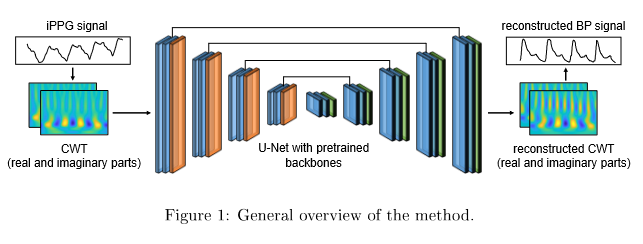)


**Analizar Transformada de Fourier para ver rango de frecuencias de la señal y aplicación de la CWT**

In [ ]:

from PIL import Image
from io import BytesIO

# Nombre de funcion: apply_fft()
# Descripcion: funcion encargada de aplicar la fft y mostrar grafico amplitud vs freq
# Entrada:
#   signal [array]: senal vsc a analizar
#   sampling_period [float]: periodo de muestreo
# Salida:
#   - grafico amplitud vs freq
def apply_fft(signal, ts):
  # Paso 1: Aplicación de la Transformada de Fourier
  transformada = np.fft.fft(signal)
  # Paso 2: Calcular las frecuencias correspondientes
  frecuencias = np.fft.fftfreq(len(signal), d=ts)

  freq_max = max(frecuencias)
  freq_min = 2.50
  abs_freq = np.abs(frecuencias)
  for f in abs_freq:
    if f <= freq_min and f != 0.00:
      freq_min = f
  print('La frecuencia minima es:',freq_min)
  print('La frecuencia maxima es:',freq_max)

  # Paso 5: Graficar amplitud vs. frecuencia
  plt.plot(frecuencias, np.abs(transformada))
  plt.xlabel('Frecuencia (Hz)')
  plt.ylabel('Amplitud')
  plt.title('Transformada de Fourier')
  plt.grid(True)
  # Mostrando la frecuencia maxima de la señal
  plt.text(0.95, 0.95, f'freq_max: {freq_max:.2f} Hz', transform=plt.gca().transAxes,
          fontsize=10, ha='right', va='top')
  plt.show()

###########################################################################################
###########################################################################################
###########################################################################################

ts = 0.2 # periodo de muestreo
fs = 1/ts # frecuencia de muestreo

# Aplicacion de CWT y espectros
for s in signals:

  print('\n')
  print('SEÑAL:', s['name_file'])
  # Paso 1: Preparar las entradas para la aplicacion de la fft y CWT
  n = len(s['signal_vsc'])  # cantidad de muestras de la senal
  t = np.linspace(0, n * ts, n)  # tiempo, con un periodo de muestreo de 0.2 segundos
  signal_to_analize = s['signal_vsc']


  # Paso 2: analizar FFT
  # Llamada a funcion que aplica la transformada de Fourier
  apply_fft(signal_to_analize, ts)

  # Paso 3: Elegir la wavelet y las escalas para la CWT
  wavelet = 'morl'  # tipo de wavelet
  scales = np.arange(1, 513)  # rango de escalas a aplicar

  # Paso 4: Aplicar la CWT
  coeficientes, frecuencias = pywt.cwt(signal_to_analize, scales, wavelet, sampling_period=ts)

  # Paso 5: Graficar el resultado de la CWT como un espectrograma
  plt.figure(figsize=(12, 6))
  plt.imshow(np.abs(coeficientes), aspect='auto', extent=[0, t[-1], scales[0], scales[-1]], cmap='jet')
  plt.colorbar(label='Magnitud')
  plt.xlabel('Tiempo (s)')
  plt.ylabel('Escala')
  plt.title('Transformada Wavelet Continua (CWT)')
  plt.show()
  #fig = plt.gcf()
  #print(fig)




  # PARA WAVELET COMPLEJA
  #En caso de usar wavelet madre **compleja**, abs a todo, menos la ultima fila y columna
  #cwtmatr = np.abs(coef[:-1, :-1])
  # Normaliza los valores de coef entre 0 y 255
  #cwt_normalized = (coef - coef.min()) / (coef.max() - coef.min()) * 255
  # Expande las dimensiones de cwt_normalized para tener la forma (altura, ancho, 3)
  #cwt_rgb = np.stack((cwt_normalized,) * 3, axis=-1)
  # cwt_rgb a tipo entero
  #cwt_rgb = np.uint8(cwt_rgb)
  # Muestra la imagen RGB
  #plt.imshow(cwt_rgb)
  #plt.show()


# Selección del rango de escalas a utilizar
Se utiliza la FFT y una función brindada por la biblioteca PyWavelet (función: pywt.scale2frequency()) para tener una aproximación del rango de escalas que se debe utilizar, esto tomando en cuenta la frecuencia máxima y mínima de nuestra señal.

In [5]:
# Analizar "escala", teniendo en cuenta que la freq maxima de la senal es de 2.5 [Hz]
# freq_max = 2.4951171875 [Hz]
# freq_min = 0.0048828125 [Hz]
# scale max -> puede ser 512 0 1024(1024 analiza freq muy bajas)
frequencies = pywt.scale2frequency('morl', [1, 512]) / ts
print(frequencies)


[4.0625     0.00793457]


# Aplicación de ICWT (Inverse Continuous Wavelet Transform)

In [ ]:



def _check_parameter_wavelet(wavelet):
    mothers = {'morlet': pycwt.mothers.Morlet}
    # Checks if input parameter is a string. For backwards
    # compatibility with Python 2 we check either if instance is a
    # `basestring` or a `str`.
    try:
        if isinstance(wavelet, basestring):
            return mothers[wavelet]()
    except NameError:
        if isinstance(wavelet, str):
            return mothers[wavelet]()
    # Otherwise, return itself.
    return



def icwt(W, sj, dt, dj, wavelet='morlet'):
    """Inverse continuous wavelet transform.
    Parameters
    ----------
    W : numpy.ndarray
        Wavelet transform, the result of the `cwt` function.
    sj : numpy.ndarray
        Vector of scale indices as returned by the `cwt` function.
    dt : float
        Sample spacing.
    dj : float, optional
        Spacing between discrete scales as used in the `cwt`
        function. Default value is 0.25.
    wavelet : instance of Wavelet class, or string
        Mother wavelet class. Default is Morlet
    Returns
    -------
    iW : numpy.ndarray
        Inverse wavelet transform.
    Example
    -------
    >> mother = wavelet.Morlet()
    >> wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(var,
           0.25, 0.25, 0.5, 28, mother)
    >> iwave = wavelet.icwt(wave, scales, 0.25, 0.25, mother)
    """
    wavelet = _check_parameter_wavelet(wavelet)

    a, b = W.shape
    c = sj.size
    if a == c:
        sj = (np.ones([b, 1]) * sj).transpose()
    elif b == c:
        sj = np.ones([a, 1]) * sj
    else:
        raise ValueError('Input array dimensions do not match.')

    # As of Torrence and Compo (1998), eq. (11)
    iW = (dj * np.sqrt(dt) / (wavelet.cdelta * wavelet.psi(0)) *
          (np.real(W) / np.sqrt(sj)).sum(axis=0))

    return iW





# Parameters
N  = len(signals[0]['signal_vsc'])
dt = 0.2
dj = 1/4

#Create a signal forexample
sig = signals[0]['signal_vsc']

# DO the CWT analysis
W, sj, freqs, coi,_,_ = pycwt.cwt(sig, dt, dj, wavelet='morlet')

# original icwt
iwave                 = pycwt.icwt(W, sj, dt, dj, 'morlet')

# fixed icwt
iwave_fixed           = icwt(W, sj, dt, dj, 'morlet')

#Plot results
plt.plot(iwave, label='ICWT')
plt.plot(iwave_fixed, label='fixed ICWT')
plt.plot(sig, label='Original')

plt.legend()



In [ ]:


# Nombre de funcion: apply_fft()
# Descripcion: funcion encargada de aplicar la fft y mostrar grafico amplitud vs freq
# Entrada:
#   signal [array]: senal vsc a analizar
#   sampling_period [float]: periodo de muestreo
# Salida:
#   - grafico amplitud vs freq
def apply_fft(signal, ts):
  # Paso 1: Aplicación de la Transformada de Fourier
  transformada = np.fft.fft(signal)
  # Paso 2: Calcular las frecuencias correspondientes
  frecuencias = np.fft.fftfreq(len(signal), d=ts)

  freq_max = max(frecuencias)
  freq_min = 2.50
  abs_freq = np.abs(frecuencias)
  for f in abs_freq:
    if f <= freq_min and f != 0.00:
      freq_min = f
  print('La frecuencia minima es:',freq_min)
  print('La frecuencia maxima es:',freq_max)

  # Paso 5: Graficar amplitud vs. frecuencia
  plt.plot(frecuencias, np.abs(transformada))
  plt.xlabel('Frecuencia (Hz)')
  plt.ylabel('Amplitud')
  plt.title('Transformada de Fourier')
  plt.grid(True)
  # Mostrando la frecuencia maxima de la señal
  plt.text(0.95, 0.95, f'freq_max: {freq_max:.2f} Hz', transform=plt.gca().transAxes,
          fontsize=10, ha='right', va='top')
  plt.show()

###########################################################################################
###########################################################################################
###########################################################################################

ts = 0.2 # periodo de muestreo
fs = 1/ts # frecuencia de muestreo

# Aplicacion de CWT y espectros
for s in signals:

  print('\n')
  print('SEÑAL:', s['name_file'])
  # Paso 1: Preparar las entradas para la aplicacion de la fft y CWT
  n = len(s['signal_vsc'])  # cantidad de muestras de la senal
  t = np.linspace(0, n * ts, n)  # tiempo, con un periodo de muestreo de 0.2 segundos
  signal_to_analize = s['signal_vsc']


  # Paso 2: analizar FFT
  # Llamada a funcion que aplica la transformada de Fourier
  apply_fft(signal_to_analize, ts)

  # Paso 3: Elegir la wavelet y las escalas para la CWT
  wavelet = 'morl'  # tipo de wavelet
  scales = np.arange(1, 513)  # rango de escalas a aplicar

  # Paso 4: Aplicar la CWT
  coeficientes, frecuencias = pywt.cwt(signal_to_analize, scales, wavelet, sampling_period=ts)


  # Crear el espectrograma pero sin ejes ni elementos adicionales
  fig, ax = plt.subplots(figsize=(12, 6))
  im = ax.imshow(np.abs(coeficientes), aspect='auto', extent=[0, t[-1], scales[0], scales[-1]], cmap='jet')

  # Quitar elementos innecesarios
  ax.axis('off')  # Desactivar todo el eje
  ax.set_frame_on(False)  # Deshabilitar el marco del gráfico

  # Guardar el gráfico como imagen en memoria
  buffer = BytesIO()
  plt.savefig(buffer, format='png', bbox_inches='tight', pad_inches=0)  # Sin márgenes ni espacios adicionales
  buffer.seek(0)

  # Convertir a imagen PIL y luego a matriz RGB
  image = Image.open(buffer)


  # La imagen tiene 4 canales (4to canal: alpha(transparencia)), se puede eliminar dicho canal con:
  if image.mode == 'RGBA':
      # Convertir a RGB para eliminar el canal alfa
      image = image.convert('RGB')


  image_rgb = np.array(image)
  # Guardando en cada diccionario asociado a una senal su respectiva matriz de imagen rgb
  s['image_rgb'] = image_rgb

  # Puedes verificar la matriz RGB y su tamaño
  print("Dimensiones de la matriz RGB:", image_rgb.shape)  # Debe ser (altura, ancho, 3)

  print('IMAGEN CONVERTIDA A MATRIZ')
  # Mostrar la matriz RGB para verificar
  plt.imshow(image_rgb)
  plt.axis('off')  # Sin ejes para mejor visualización
  plt.show()


  # PARA WAVELET COMPLEJA
  #En caso de usar wavelet madre **compleja**, abs a todo, menos la ultima fila y columna
  #cwtmatr = np.abs(coef[:-1, :-1])
  # Normaliza los valores de coef entre 0 y 255
  #cwt_normalized = (coef - coef.min()) / (coef.max() - coef.min()) * 255
  # Expande las dimensiones de cwt_normalized para tener la forma (altura, ancho, 3)
  #cwt_rgb = np.stack((cwt_normalized,) * 3, axis=-1)
  # cwt_rgb a tipo entero
  #cwt_rgb = np.uint8(cwt_rgb)
  # Muestra la imagen RGB
  #plt.imshow(cwt_rgb)
  #plt.show()

for s in signals:
  print(s)